## Demo:

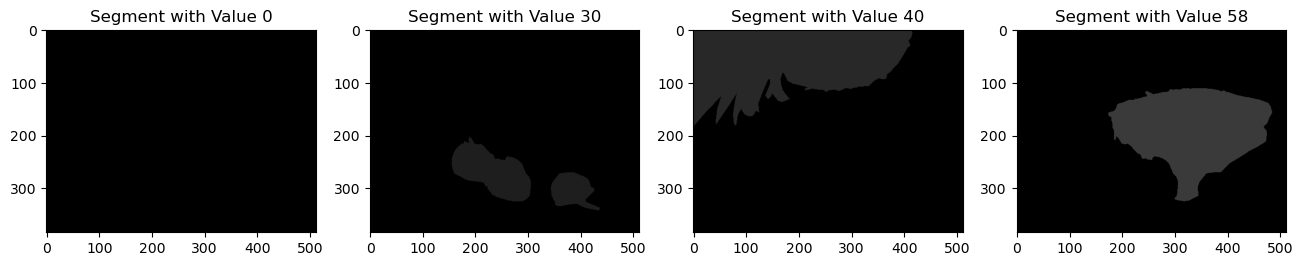

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image.jpg' with the path to your image
sam = '00000953'
image_path = '/home/samyakr2/food/FoodSeg103/Images/ann_dir/train/{}.png'.format(sam)

# Read the image
image = cv2.imread(image_path)

# Get unique pixel values
unique_pixel_values = np.unique(image)

# Plot each segment with one unique value
num_segments = len(unique_pixel_values)

plt.figure(figsize=(4 * num_segments, 4))
for i, pixel_value in enumerate(unique_pixel_values):
    # Create a mask for the current pixel value
    mask = np.all(image == pixel_value, axis=-1)

    # Create an image with only the selected segment
    image_segment = np.zeros_like(image)
    image_segment[mask] = image[mask]

    # Plot the image segment
    plt.subplot(1, num_segments, i + 1)
    plt.imshow(cv2.cvtColor(image_segment, cv2.COLOR_BGR2RGB))
    plt.title(f'Segment with Value {pixel_value}')

plt.show()


## Get Labels:

In [ ]:
import os
import cv2
import numpy as np
import torch
label_vector = {}
train_path = '/home/samyakr2/food/FoodSeg103/Images/ann_dir/test/'
for idx, image_name in enumerate(os.listdir(train_path)):
    train_img_path = train_path + image_name
    image = cv2.imread(train_img_path)
    unique_pixel_values = torch.tensor(np.unique(image), dtype=torch.long)
    vector = torch.zeros(104) ## length of labels
    indices = unique_pixel_values[1:] # Exclude index 0
    vector[indices] = 1
    label_vector[image_name[:-4]] = vector

In [ ]:
np.save('/home/samyakr2/food/FoodSeg103/test_labels.npy', label_vector)